In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Reading Data

In [56]:
df = pd.read_csv('C:\\Users\\Sruthi\\Desktop\\project\\new\\winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [57]:
col_names = [col.lower().replace(' ', '_') for col in df.columns]

df.columns = col_names

In [58]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [59]:
df.shape

(6497, 14)

### Dropping Duplicates

In [60]:
df = df.drop_duplicates()

In [61]:
df.shape

(5320, 14)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5320 non-null   float64
 1   volatile_acidity      5320 non-null   float64
 2   citric_acid           5320 non-null   float64
 3   residual_sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free_sulfur_dioxide   5320 non-null   float64
 6   total_sulfur_dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   ph                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  good                  5320 non-null   int64  
 13  color                 5320 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 623.4+ KB


### Univariate Visual Analysis

Univariate visual analysis involves examining and interpreting data on a single variable. This type of analysis helps to understand the distribution, central tendency, and dispersion of a single variable

**Histograms:**
    
A histogram is a graphical representation of the distribution of a dataset.
It displays the frequency of data points within certain ranges or bins.
Helps to identify patterns and trends in the data.

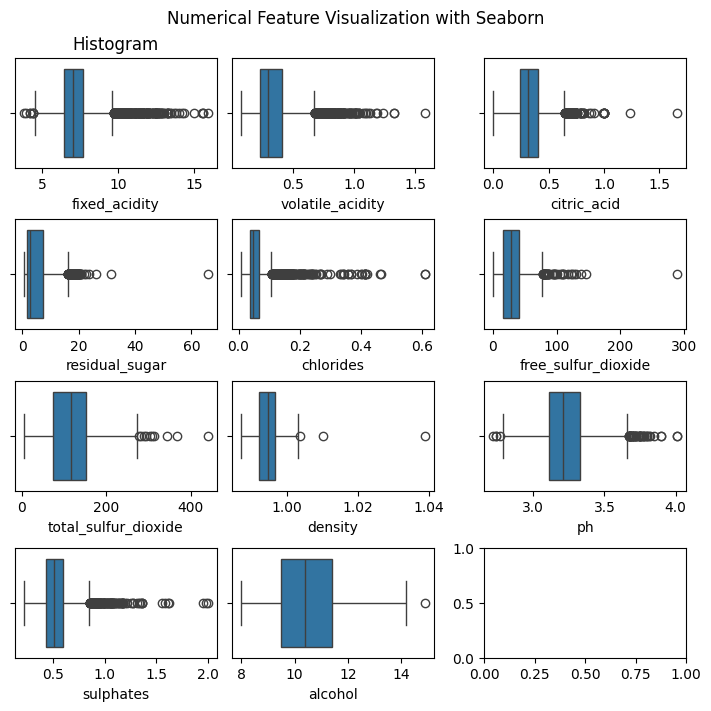

In [63]:
fig, axs = plt.subplots(4,3, figsize=(7,7), layout="constrained")


fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0][0].set_title("Histogram")

sns.boxplot(data=df, x='fixed_acidity', ax=axs[0][0])
#axs[0][1].set_title("KDE")

sns.boxplot(data=df, x='volatile_acidity', ax=axs[0][1])
#axs[0][2].set_title("ECDF")

sns.boxplot(data=df, x='citric_acid', ax=axs[0][2])
#axs[1][0].set_title("Box Plot")

sns.boxplot(data=df, x='residual_sugar', ax=axs[1][0])
#axs[1][1].set_title("Boxen Plot")

sns.boxplot(data=df, x='chlorides', ax=axs[1][1])
#axs[1][2].set_title("Boxen Plot")

sns.boxplot(data=df, x='free_sulfur_dioxide', ax=axs[1][2])
#axs[2][0].set_title("Boxen Plot")

sns.boxplot(data=df, x='total_sulfur_dioxide', ax=axs[2][0])
#axs[2][1].set_title("Boxen Plot")

sns.boxplot(data=df, x='density', ax=axs[2][1])
#axs[3][0].set_title("Boxen Plot")

sns.boxplot(data=df, x='ph', ax=axs[2][2])
#axs[3][1].set_title("Boxen Plot")

sns.boxplot(data=df, x='sulphates', ax=axs[3][0])
#axs[3][2].set_title("Boxen Plot")

sns.boxplot(data=df, x='alcohol', ax=axs[3][1])

plt.show()

### Identify and remove outliers

Visual Inspection: (one of the outliers removal method)

Plotting data using box plots, scatter plots, or histograms. Visual inspection can often reveal obvious outliers.


In [64]:
df = df.loc[df["fixed_acidity"]<15]
df = df.loc[df['volatile_acidity']<1.2]
df = df.loc[df['citric_acid']<1]
df = df.loc[df['residual_sugar']<60]
df = df.loc[df['chlorides']<0.5]
df = df.loc[df['free_sulfur_dioxide']<250]
df = df.loc[df['total_sulfur_dioxide']<400]
df = df.loc[df['density']<1]
df = df.loc[df["ph"]<3.9]
df = df.loc[df['sulphates']<1.5]

In [65]:
df.shape

(5162, 14)

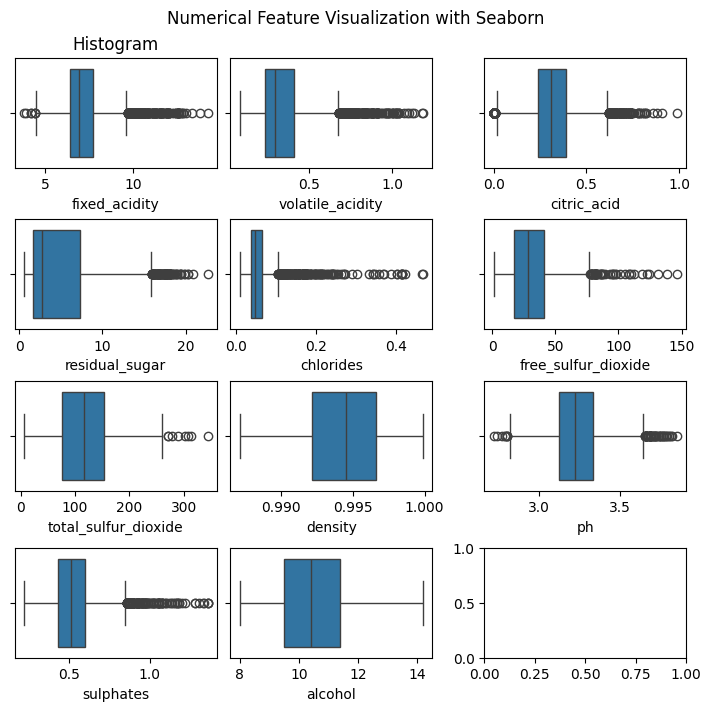

In [66]:
fig, axs = plt.subplots(4,3, figsize=(7,7), layout="constrained")

fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0][0].set_title("Histogram")

sns.boxplot(data=df, x='fixed_acidity', ax=axs[0][0])
#axs[0][1].set_title("KDE")

sns.boxplot(data=df, x='volatile_acidity', ax=axs[0][1])
#axs[0][2].set_title("ECDF")

sns.boxplot(data=df, x='citric_acid', ax=axs[0][2])
#axs[1][0].set_title("Box Plot")

sns.boxplot(data=df, x='residual_sugar', ax=axs[1][0])
#axs[1][1].set_title("Boxen Plot")

sns.boxplot(data=df, x='chlorides', ax=axs[1][1])
#axs[1][2].set_title("Boxen Plot")

sns.boxplot(data=df, x='free_sulfur_dioxide', ax=axs[1][2])
#axs[2][0].set_title("Boxen Plot")

sns.boxplot(data=df, x='total_sulfur_dioxide', ax=axs[2][0])
#axs[2][1].set_title("Boxen Plot")

sns.boxplot(data=df, x='density', ax=axs[2][1])
#axs[3][0].set_title("Boxen Plot")

sns.boxplot(data=df, x='ph', ax=axs[2][2])
#axs[3][1].set_title("Boxen Plot")

sns.boxplot(data=df, x='sulphates', ax=axs[3][0])
#axs[3][2].set_title("Boxen Plot")

sns.boxplot(data=df, x='alcohol', ax=axs[3][1])

plt.show()


Data after removing outliers

In [67]:
df_num = df.select_dtypes(include=["float64"])
df_cat = df.select_dtypes(include="object")
df_dis = df.select_dtypes(include="int64")

In [68]:
df_num.shape 

(5162, 11)

In [69]:
df_num.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],
      dtype='object')

In [70]:
df_cat.shape      

(5162, 1)

In [71]:
df_cat.columns

Index(['color'], dtype='object')

In [72]:
df_dis.shape

(5162, 2)

In [73]:
df_dis.columns

Index(['quality', 'good'], dtype='object')

<Axes: xlabel='color', ylabel='count'>

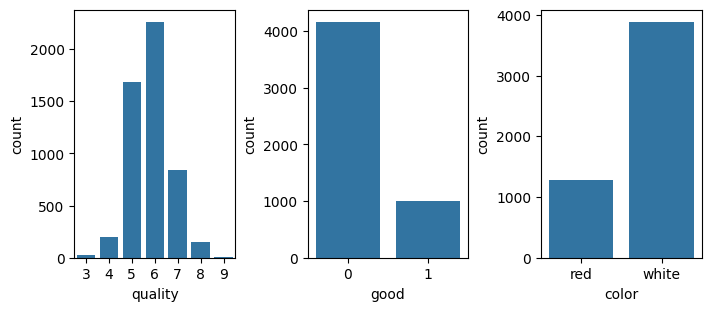

In [90]:
fig,axs=plt.subplots(1,3,figsize=(7,3),layout="constrained")

sns.countplot(data=df_dis, x="quality",ax=axs[0])

sns.countplot(data=df_dis, x="good",ax=axs[1])

sns.countplot(data=df_cat, x="color",ax=axs[2])

### Univariate Non-Visual Analysis

#### Categorical - color (white , red)

In [74]:
for i in df_cat:
  print("Categorical Columns")
  print(df_cat[i].agg(["count","unique","nunique"]))
  print(df_cat[i].value_counts(),"\n")

Categorical Columns
count              5162
unique     [red, white]
nunique               2
Name: color, dtype: object
color
white    3886
red      1276
Name: count, dtype: int64 



#### Discrete - Quality (3,4,5,6,7,8,9) and Good (0 , 1)

In [75]:
for i in df_dis:
  print("Discrete Columns")
  print(df_dis[i].agg(["count","unique","nunique"]))
  print(df_dis[i].value_counts(),"\n")

Discrete Columns
count                       5162
unique     [5, 6, 7, 4, 8, 3, 9]
nunique                        7
Name: quality, dtype: object
quality
6    2261
5    1679
7     844
4     201
8     146
3      26
9       5
Name: count, dtype: int64 

Discrete Columns
count        5162
unique     [0, 1]
nunique         2
Name: good, dtype: object
good
0    4167
1     995
Name: count, dtype: int64 



#### Numerical

In [91]:
df_num.agg(["min","max","mean","median","std","skew","kurt"])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
max,14.200000,1.185000,0.990000,22.600000,0.467000,146.500000,344.000000,0.999900,3.850000,1.360000,14.200000
mean,7.150494,0.341639,0.314095,4.886846,0.055903,29.984405,113.913890,0.994362,3.226122,0.529057,10.571283
median,6.900000,0.290000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994500,3.220000,0.510000,10.400000
std,1.211428,0.165264,0.141372,4.193184,0.034851,17.357924,55.725880,0.002754,0.158627,0.141007,1.178387
skew,1.360796,1.418109,0.212804,1.229548,4.735531,0.838857,-0.007986,-0.107745,0.340019,1.221164,0.534965
kurt,3.107165,2.107817,0.918954,0.609920,36.704457,1.413095,-0.522308,-0.912758,0.219844,2.925074,-0.560955


**Min (Minimum):**

Represents the minimum value observed for each chemical property.

**Max (Maximum):**

Represents the maximum value observed for each chemical property.

**Mean (Average):**

Represents the mean (average) value for each chemical property.

**Median:**

Represents the median (middle value) for each chemical property.

**Std (Standard Deviation):**

Represents the standard deviation, which measures the amount of variation or dispersion of each chemical property.

**Skewness:**

Represents the skewness, which measures the asymmetry or skew of the distribution of each chemical property. Positive skewness indicates a right-skewed distribution, and negative skewness indicates a left-skewed distribution.

**Kurtosis:**

Represents the kurtosis, which measures the "tailedness" of the distribution of each chemical property. Positive kurtosis indicates heavy tails (more extreme values), and negative kurtosis indicates light tails.

### Bivarent Non-Visual Analysis

Numerical Vs Numerical

In [89]:
df_num.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
fixed_acidity,1.000000,0.202604,0.300554,-0.126149,0.284071,-0.281023,-0.323451,0.449693,-0.267913,0.283819,-0.098805
volatile_acidity,0.202604,1.000000,-0.415228,-0.172281,0.374864,-0.350122,-0.402342,0.313611,0.248619,0.224032,-0.075487
citric_acid,0.300554,-0.415228,1.000000,0.127961,0.026569,0.143482,0.206800,0.043778,-0.336255,0.032491,0.005086
residual_sugar,-0.126149,-0.172281,0.127961,1.000000,-0.131124,0.411511,0.482146,0.485271,-0.236845,-0.194212,-0.294910
chlorides,0.284071,0.374864,0.026569,-0.131124,1.000000,-0.191759,-0.272772,0.393198,0.048706,0.368818,-0.281297
free_sulfur_dioxide,-0.281023,-0.350122,0.143482,0.411511,-0.191759,1.000000,0.718203,0.008539,-0.150538,-0.207244,-0.166686
total_sulfur_dioxide,-0.323451,-0.402342,0.206800,0.482146,-0.272772,0.718203,1.000000,-0.001624,-0.223594,-0.288563,-0.246184
density,0.449693,0.313611,0.043778,0.485271,0.393198,0.008539,-0.001624,1.000000,0.066233,0.275243,-0.699550
ph,-0.267913,0.248619,-0.336255,-0.236845,0.048706,-0.150538,-0.223594,0.066233,1.000000,0.211092,0.080813
sulphates,0.283819,0.224032,0.032491,-0.194212,0.368818,-0.207244,-0.288563,0.275243,0.211092,1.000000,-0.002584


**Observation**

The above table provided is a correlation matrix for various chemical properties of wine. Each cell in the matrix contains the correlation coefficient between the corresponding pairs of variables. Here's a quick interpretation of the correlation coefficients:

**Positive Correlation:**

The closer the coefficient is to 1, the stronger the positive correlation.
Example: The correlation coefficient between "density" and "residual sugar" is 0.525320, indicating a moderate positive correlation.

**Negative Correlation:**

The closer the coefficient is to -1, the stronger the negative correlation.
Example: The correlation coefficient between "alcohol" and "density" is -0.715829, indicating a strong negative correlation.

**No Correlation:**

A coefficient close to 0 suggests a weak or no linear correlation.
Example: The correlation coefficient between "citric acid" and "total sulfur dioxide" is close to 0 (0.208467), suggesting a weak correlation.
Here are a few observations based on the provided correlation matrix:

**Alcohol and Density:**

Strong negative correlation (-0.715829). As alcohol content increases, density tends to decrease.

**Free Sulfur Dioxide and Total Sulfur Dioxide:**

Strong positive correlation (0.718723). The amount of free sulfur dioxide tends to increase with the total sulfur dioxide content.

**Chlorides and Sulphates:**

Moderate positive correlation (0.362997). Higher chloride levels are associated with higher sulfate levels.

**pH and Citric Acid:**

Negative correlation (-0.321749). As pH decreases, citric acid content tends to increase.

Discrete num vs Discrete num

In [88]:
pd.crosstab(df_dis["quality"],df_dis["good"],normalize=True)

good,0,1
quality,,
3,0.005037,0.000000
4,0.038938,0.000000
5,0.325262,0.000000
6,0.438009,0.000000
7,0.000000,0.163503
8,0.000000,0.028284
9,0.000000,0.000969


Categorical 

In [ ]:
pd.crosstab(df_dis["quality"],df_cat["color"],normalize=True)

color,red,white
quality,,
3,0.001550,0.003487
4,0.009492,0.029446
5,0.104611,0.220651
6,0.097443,0.340566
7,0.030802,0.132701
8,0.003293,0.024990
9,0.000000,0.000969


In [ ]:
pd.crosstab(df_cat["color"],df_dis["good"],normalize=True)

good,0,1
color,,
red,0.205401,0.032883
white,0.594917,0.166799


### Bivarent Visual Analysis

Numerical vs Numerical

<Axes: >

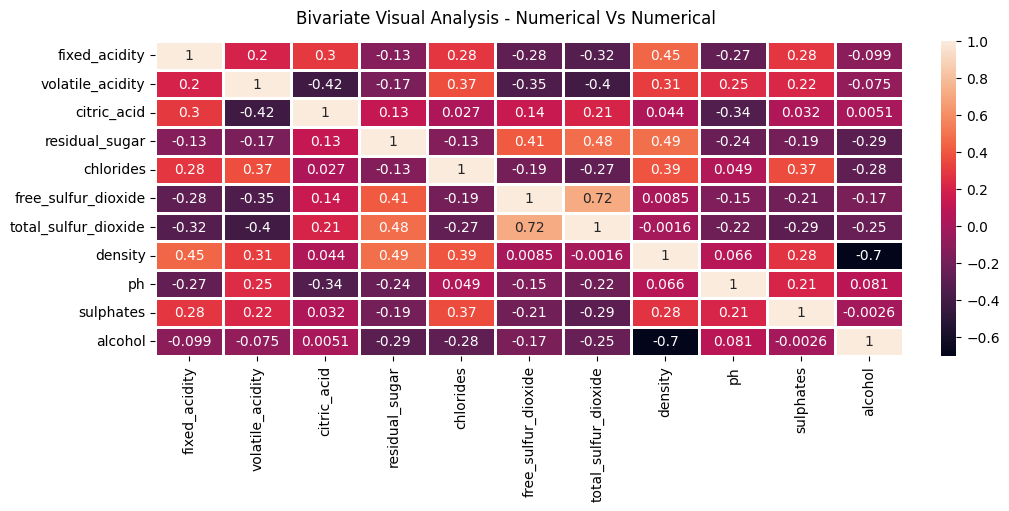

In [94]:
fig = plt.figure(layout="constrained",figsize=(10,5))

fig.suptitle("Bivariate Visual Analysis - Numerical Vs Numerical")

sns.heatmap(df_num.corr(), annot=True, linewidths=0.8)

**Observation** : 

Chlorides and Citric acid , Alcohol and Citric acid has no relationship !

Residual Sugars and Density,Free and Total Sulphur dioxide are directly proportional to each other and are strong

Categorical vs Categorical

<Axes: xlabel='quality', ylabel='count'>

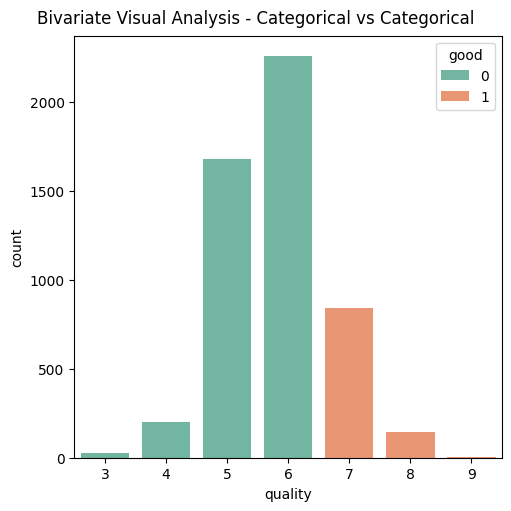

In [105]:
fig = plt.figure(layout="constrained",figsize=(5,5))

fig.suptitle("Bivariate Visual Analysis - Categorical vs Categorical")

sns.countplot(x="quality", hue="good", data=df_dis, palette="Set2", dodge=False)

Numerical vs Categorical (Quality)

<Axes: xlabel='quality', ylabel='ph'>

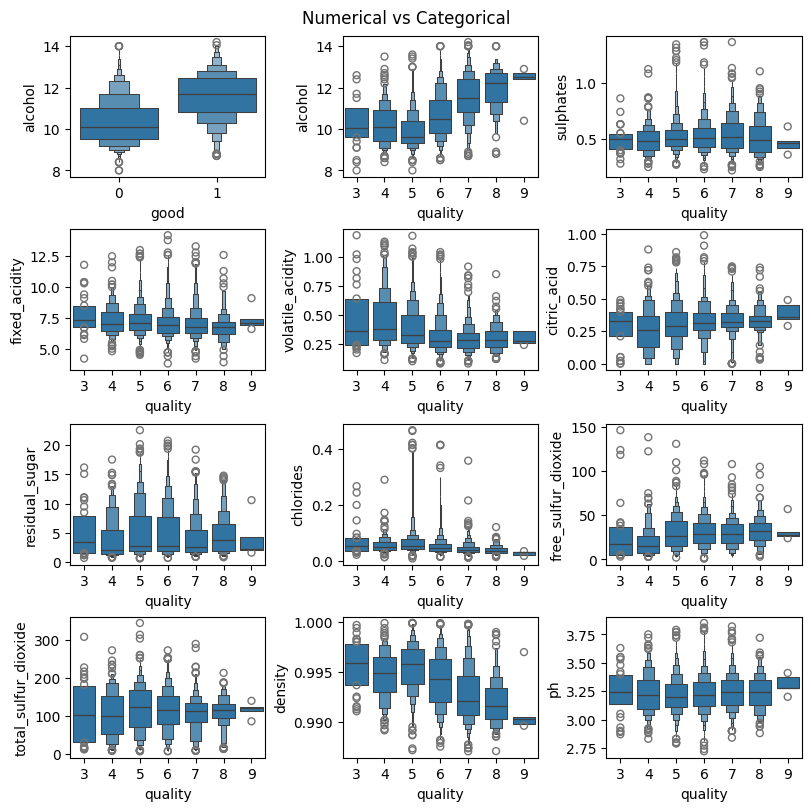

In [108]:
fig, axs = plt.subplots(4,3, figsize=(8,8), constrained_layout=True)

fig.suptitle("Numerical vs Categorical")

#axs[0][0].set_title("Boxen Plot")
sns.boxenplot(data=df, x='good', y='alcohol', ax=axs[0][0])

#axs[0][1].set_title("Boxen Plot")
sns.boxenplot(data=df, x='quality', y='alcohol', ax=axs[0][1])

#axs[0][2].set_title("Boxen Plot")
sns.boxenplot(data=df,y='sulphates', x='quality',  ax=axs[0][2])

#axs[0][3].set_title("Box Plot")
sns.boxenplot(data=df,y='fixed_acidity', x='quality',  ax=axs[1][0])

#axs[0][4].set_title("Box Plot")
sns.boxenplot(data=df,y='volatile_acidity', x='quality',  ax=axs[1][1])

#axs[0][5].set_title("Box Plot")
sns.boxenplot(data=df,y='citric_acid', x='quality',  ax=axs[1][2])

#axs[1][0].set_title("Box Plot")
sns.boxenplot(data=df,y='residual_sugar', x='quality',  ax=axs[2][0])

#axs[1][1].set_title("Box Plot")
sns.boxenplot(data=df,y='chlorides', x='quality',  ax=axs[2][1])

#axs[1][2].set_title("Box Plot")
sns.boxenplot(data=df,y='free_sulfur_dioxide', x='quality',  ax=axs[2][2])

#axs[1][3].set_title("Box Plot")
sns.boxenplot(data=df,y='total_sulfur_dioxide', x='quality',  ax=axs[3][0])

#axs[1][4].set_title("Box Plot")
sns.boxenplot(data=df,y='density', x='quality',  ax=axs[3][1])

#axs[1][5].set_title("Box Plot")
sns.boxenplot(data=df,y='ph', x='quality',  ax=axs[3][2])

Numerical vs Categorical (Good)

<Axes: xlabel='good', ylabel='ph'>

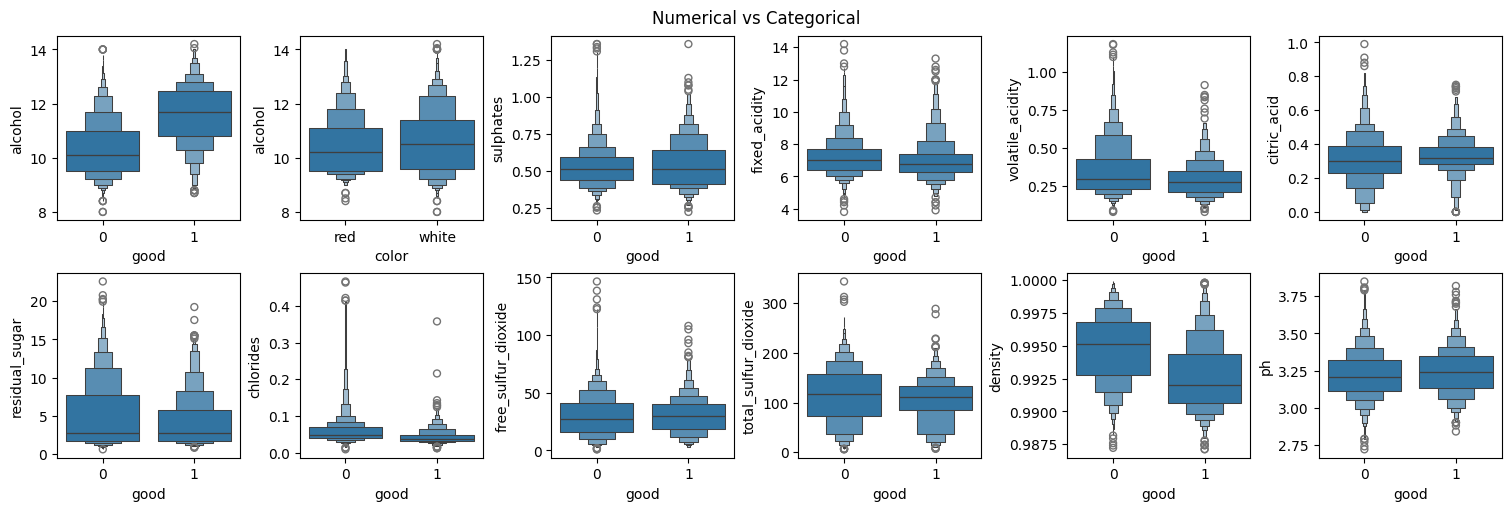

In [112]:
fig, axs = plt.subplots(2,6, figsize=(15, 5), constrained_layout=True)
fig.suptitle("Numerical vs Categorical")

#axs[0][0].set_title("Boxen Plot")
sns.boxenplot(data=df, x='good', y='alcohol', ax=axs[0][0])

#axs[0][1].set_title("Boxen Plot")
sns.boxenplot(data=df, x='color', y='alcohol', ax=axs[0][1])

#axs[0][2].set_title("Box Plot")
sns.boxenplot(data=df,y='sulphates', x='good',  ax=axs[0][2])

#axs[0][3].set_title("Box Plot")
sns.boxenplot(data=df,y='fixed_acidity', x='good',  ax=axs[0][3])

#axs[0][4].set_title("Box Plot")
sns.boxenplot(data=df,y='volatile_acidity', x='good',  ax=axs[0][4])

#axs[0][5].set_title("Box Plot")
sns.boxenplot(data=df,y='citric_acid', x='good',  ax=axs[0][5])

#axs[1][0].set_title("Box Plot")
sns.boxenplot(data=df,y='residual_sugar', x='good',  ax=axs[1][0])

#axs[1][1].set_title("Box Plot")
sns.boxenplot(data=df,y='chlorides', x='good',  ax=axs[1][1])

#axs[1][2].set_title("Box Plot")
sns.boxenplot(data=df,y='free_sulfur_dioxide', x='good',  ax=axs[1][2])

#axs[1][3].set_title("Box Plot")
sns.boxenplot(data=df,y='total_sulfur_dioxide', x='good',  ax=axs[1][3])

#axs[1][4].set_title("Box Plot")
sns.boxenplot(data=df,y='density', x='good',  ax=axs[1][4])

#axs[1][5].set_title("Box Plot")
sns.boxenplot(data=df,y='ph', x='good',  ax=axs[1][5])

**Observation** : From taste percpective all plots has shown a similar tendency , but **taste is affected by ALCOHOL and DENSITY** 

<Axes: xlabel='quality', ylabel='alcohol'>

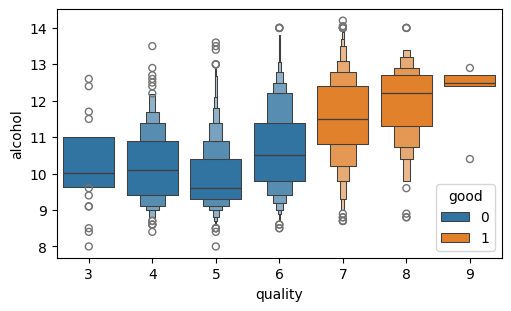

In [116]:
fig, axs = plt.subplots(figsize=(5, 3), constrained_layout=True)

sns.boxenplot(data=df, x='quality', y='alcohol', hue = "good")

**Observation :** As we can see alcohol is affecting taste. Quality (7 - 9) has mostly provided good taste as their standards are high 

### Observation

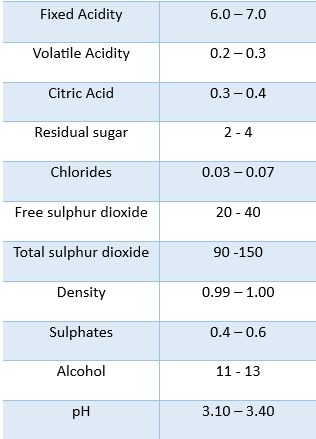

In [119]:
from IPython.display import display, Image

# Specify the path to your image file
image_path = r'C:\Users\Sruthi\Desktop\team10\Capture.png'

# Display the image
display(Image(filename=image_path))


Using all of the Univarent and Bivarent analyses, we were able to determine a range of chemical proportions that needed to be combined to create the ideal wine. 